In [1]:
import os
import pandas as pd

# 1. Load your data
path0 = input('Select the experimental session to analyze: ')
file_name = 'Fluorescence.csv'
file_path = os.path.join(path0, file_name)

# Check if the file exists
if os.path.exists(file_path):
    # Read the CSV file using pandas
    A = pd.read_csv(file_path,  quotechar='"', encoding='utf-8', header=None, names=['Timestamps', 'Markings', 'CH1-410', 'CH1-470'])
    
    # Display the first few rows of the DataFrame to verify the data
    A.head()
else:
    print(f"File '{file_name}' not found in the specified directory.")

Select the experimental session to analyze:  C:\Users\Ksenia\OneDrive\Desktop


In [2]:
A = A.drop(A.index[:2])
# Display the updated DataFrame
display(A)
A.info()

,Timestamps,Markings,CH1-410,CH1-470
2,0,NaN,46.558,47.319
3,33.334,NaN,46.504,47.132
4,66.667,NaN,46.521,47.315
5,100,NaN,46.607,47.182
6,133.331,NaN,46.504,47.016
...,...,...,...,...
42622,1420666.664,NaN,41.235,40.152
42623,1420700.001,NaN,41.24,40.067
42624,1420733.33,NaN,41.234,40.041
42625,1420766.666,NaN,41.215,39.987


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42625 entries, 2 to 42626
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Timestamps  42625 non-null  object
 1   Markings    81 non-null     object
 2   CH1-410     42625 non-null  object
 3   CH1-470     42625 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


2. Load the indx of relevant timestamps: 
this is hardwired into the program through med associates, if the SG-231 TTL parameters ever change, this might also need to change. TTL set to "low" now so 0=onset, 1=offset. 
%Input1*2*0; SG onset (tone start
%Input1*2*1; offset (shock end if training, tone end if extinction) - to get the shock onset need to subtract 2 seco s
%from this timestep later. 

In [3]:
indx_onset = A[A['Markings'] == 'Input1*2*0;'].index.tolist()

# Remove the last element if it exists
if indx_onset:
    indx_onset.pop()

# Display the onset indices
print("Onset Indices:", indx_onset)

# Similarly for 'Input1*2*1;'
indx_offset = A[A['Markings'] == 'Input1*2*1;'].index.tolist()

# Display the offset indices
print("Offset Indices:", indx_offset)

Onset Indices: [5476, 6496, 7427, 8207, 9108, 9978, 10939, 11929, 12979, 13820, 14720, 15561, 16521, 17331, 18262, 19282, 20063, 20963, 21953, 22704, 23574, 24354, 25375, 26275, 27116, 28076, 28887, 29757, 30717, 31768, 32759, 33659, 34679, 35490, 36360, 37411, 38191, 39032, 40082, 41042]
Offset Indices: [6077, 7097, 8027, 8807, 9708, 10579, 11539, 12529, 13580, 14420, 15321, 16161, 17121, 17932, 18862, 19883, 20663, 21563, 22554, 23304, 24174, 24955, 25976, 26875, 27716, 28677, 29487, 30357, 31317, 32368, 33359, 34259, 35280, 36090, 36960, 38011, 38791, 39631, 40682, 41642]


In [4]:
# Adjust the number of trials
# N = 5  # for training
N = 40  # for extinction - comment/uncomment based on the session type

toneon_ts = []  # tone onset timestamp
for i in range(N):
    tone_i = A['Timestamps'].iloc[indx_onset[i]]
    toneon_ts.append(tone_i)

# Display the tone onset timestamps
print("Tone Onset Timestamps:", toneon_ts)


Tone Onset Timestamps: ['182533.335', '216533.333', '247566.664', '273566.666', '303599.997', '332600.003', '364633.337', '397633.336', '432633.333', '460666.668', '490666.666', '518699.999', '550699.997', '577699.998', '608733.335', '642733.333', '668766.669', '698766.664', '731766.668', '756799.997', '785800', '811800.003', '845833.332', '875833.334', '903866.668', '935866.666', '962900', '991900', '1023899.998', '1058933.335', '1091966.665', '1121966.665', '1155966.666', '1183000.002', '1211999.997', '1247033.33', '1273033.333', '1301066.665', '1336066.665', '1368066.664']


In [5]:
# Find the calcium and isosbestic signals:

timestamps = A['Timestamps'].values
iso_signal1 = A['CH1-410'].values  # for Channel 1
ca_signal1 = A['CH1-470'].values  # for Channel 1

In [10]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/2d/46/cf3fce41ffc543b6e94dadbe6b647559d591df446ec716e72c3b4ce71b34/seaborn-0.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.8 kB 281.8 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.8 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


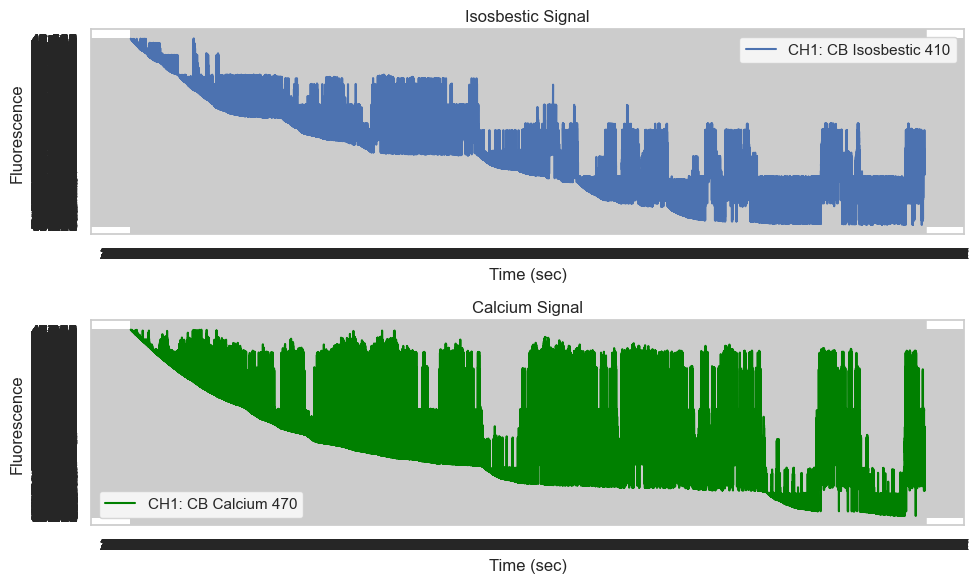

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set Seaborn style
sns.set(style="whitegrid")

# Plot isosbestic signal
plt.figure(figsize=(10, 6))
plt.subplot(211)
sns.lineplot(x=timestamps, y=iso_signal1, label='CH1: CB Isosbestic 410')
plt.title('Isosbestic Signal')
plt.xlabel('Time (sec)')
plt.ylabel('Fluorescence')
plt.legend()

# Plot calcium signal
plt.subplot(212)
sns.lineplot(x=timestamps, y=ca_signal1, label='CH1: CB Calcium 470', color='green')
plt.title('Calcium Signal')
plt.xlabel('Time (sec)')
plt.ylabel('Fluorescence')
plt.legend()

plt.tight_layout()
plt.show()

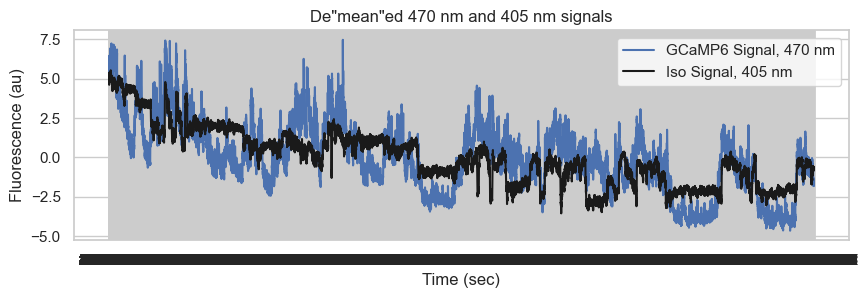

In [12]:
#5. Calculate dF/F and visualize:
import numpy as np
import matplotlib.pyplot as plt

# Ensure that data2 and data1 are numeric arrays
data2_numeric = np.asarray(data2, dtype=np.float64)
data1_numeric = np.asarray(data1, dtype=np.float64)

# Use polyfit to fit least squares linear fit
P = np.polyfit(data2_numeric, data1_numeric, 1)
a, b = P[0], P[1]
fit400 = a * data2_numeric + b
dF = 100 * ((data1_numeric - fit400) / fit400)  # Get dF/F in %

# Visualize "demeaned" 470 and 405 signals
MEANFIT = plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(timestamps, data1_numeric - np.mean(data1_numeric), label='GCaMP6 Signal, 470 nm')
plt.plot(timestamps, data2_numeric - np.mean(data2_numeric), 'k', label='Iso Signal, 405 nm')
plt.legend()
plt.xlabel('Time (sec)', fontsize=12)
plt.ylabel('Fluorescence (au)', fontsize=12)
plt.title('De"mean"ed 470 nm and 405 nm signals', fontsize=12)

plt.show()



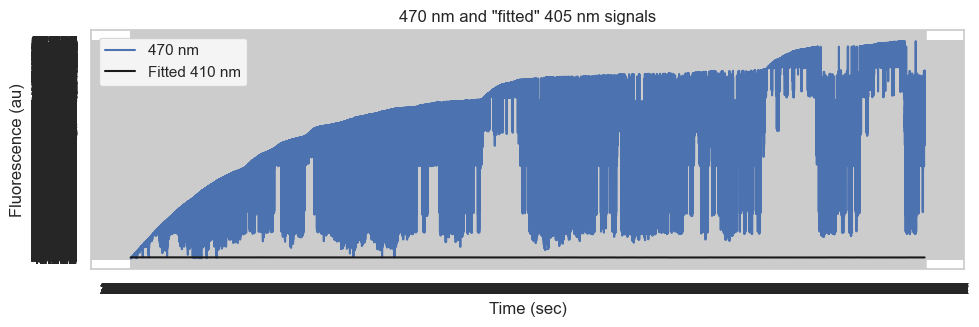

In [14]:
# 470 and fit signal
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 2)
plt.plot(timestamps, ca_signal1, label='470 nm')
plt.plot(timestamps, fit400, 'k', label='Fitted 410 nm')
plt.legend()
plt.xlabel('Time (sec)', fontsize=12)
plt.ylabel('Fluorescence (au)', fontsize=12)
plt.title('470 nm and "fitted" 405 nm signals', fontsize=12)

plt.tight_layout()
plt.show()


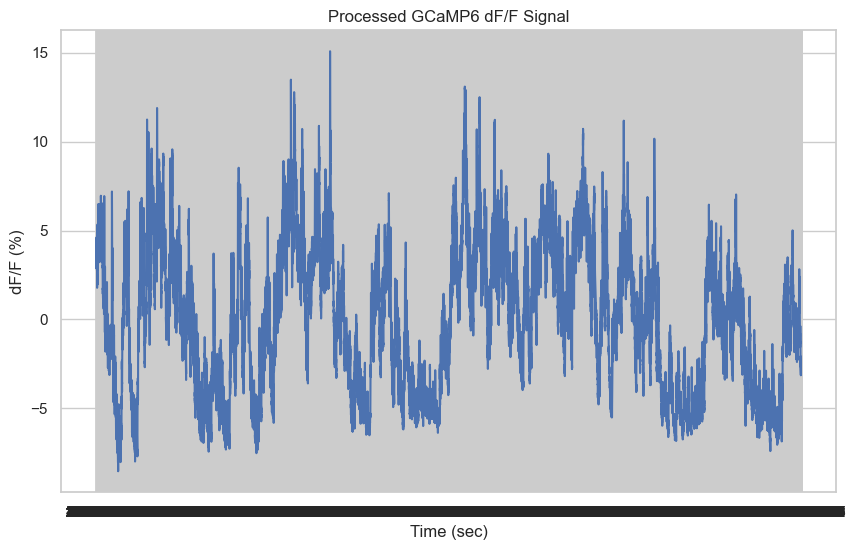

In [15]:
DFF = plt.figure(figsize=(10, 6))

plt.plot(timestamps, dF)
plt.xlabel('Time (sec)', fontsize=12)
plt.ylabel('dF/F (%)', fontsize=12)
plt.title('Processed GCaMP6 dF/F Signal', fontsize=12)

plt.show()

In [18]:
import numpy as np

# Assuming timestamps is a column in your DataFrame
timestamps_numeric = pd.to_numeric(timestamps, errors='coerce')

# Convert timestamps to seconds
time = timestamps_numeric / 1000

# Estimate dt
dt = np.mean(np.diff(time))

# Calculate sampling frequency
F = 1 / dt

# Adjust these values as needed for your session
preStimWin = int(10 * F)  # duration of pre-stimulus baseline in samples
postStimWin = int(40 * F)  # duration of post-stimulus response window in samples

# Create a combined array with time in the first column and dF in the second column
sig470 = np.column_stack((time, dF))

# Convert tone onset timestamps to seconds
toneon_ts_numeric = pd.to_numeric(toneon_ts, errors='coerce')
tst = toneon_ts_numeric / 1000
tst = tst.reshape(-1, 1)  # Ensure tst is a column vector

# Find indices corresponding to tone onset timestamps
ts_T = []
for ts in tst:
    idx = np.where(sig470[:, 0] == ts)[0]
    if len(idx) > 0:
        ts_T.append(idx[0])

ts_T = np.array(ts_T)

# Extract time and dF around tone onset
tmT = [time[ts - preStimWin:ts + postStimWin] - time[ts] for ts in ts_T]
deltaF_T = [dF[ts - preStimWin:ts + postStimWin] for ts in ts_T]

# Convert lists to numpy arrays
tmT = np.array(tmT)
deltaF_T = np.array(deltaF_T)


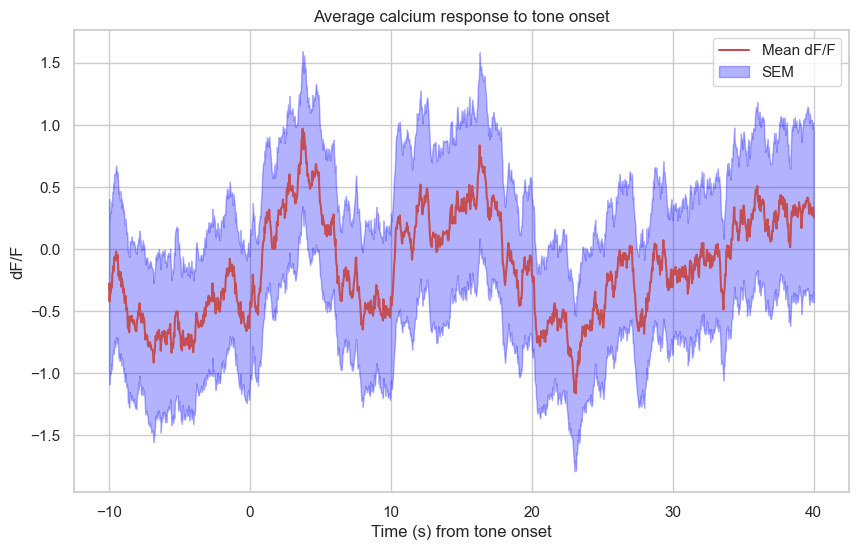

In [20]:
import numpy as np
import matplotlib.pyplot as plt


# Initialize arrays for time and deltaF/F
tmT = np.zeros((len(ts_T), preStimWin + postStimWin + 1))
deltaF_T = np.zeros((len(ts_T), preStimWin + postStimWin + 1))

# Populate tmT and deltaF_T arrays
for trl, ts in enumerate(ts_T):
    tmT[trl, :] = time[ts - preStimWin : ts + postStimWin + 1] - time[ts_T[trl]]
    deltaF_T[trl, :] = dF[ts - preStimWin : ts + postStimWin + 1]

# Plot responses aligned to tone onset
deltaF_Tmu = np.mean(deltaF_T, axis=0)
sem_deltaF_T = np.std(deltaF_T, axis=0) / np.sqrt(deltaF_T.shape[0])

plt.figure(figsize=(10, 6))
plt.plot(tmT[0, :], deltaF_Tmu, 'r', label='Mean dF/F')
plt.fill_between(tmT[0, :], deltaF_Tmu - sem_deltaF_T, deltaF_Tmu + sem_deltaF_T, color='blue', alpha=0.3, label='SEM')
plt.ylabel('dF/F')
plt.xlabel('Time (s) from tone onset')
plt.title('Average calcium response to tone onset')
plt.legend()
plt.show()

